                    ATIVIDADE 1 - "PORTA DOS DESESPERADOS" - ME323, 1º SEMESTRE DE 2019
                                UNIVERSIDADE ESTADUAL DE CAMPINAS - UNICAMP
                                
Alunos / RA :
        -Iago Caran Aquino - 198921
        -Tomás S. R. Silva - 187720

Resumo:
    O objetivo desse trabalho é fazer uma simulação do programa "porta dos desesperados". Nesse programa, tem-se inicialmente três portas iniciais, na qual duas estão vazias e uma contém um prêmio. Inicialmente, é pedido que o participante do programa escolha uma das três portas. Logo após, o apresentador do programa abre uma das portas remanescentes que não contém o prêmio. Em seguida, o apresentador pergunta ao participante se ele quer trocar de porta ou se ele deseja continuar com a escolha inicial.
    Desse forma, sabemos que é mais vantajoso trocar de porta do que continuar com a porta inicial, numa probabilidade de vitória de 2/3 contra 1/3. O que queremos nesse trabalho é justamente fazer uma simulação desse programa para verificarmos tal vantagem.

In [1]:
%matplotlib inline
from pylab import *
import numpy as np
import random

# Ao longo do programa seguimos algumas convenções:
#  - 0 : nenhum prêmio
#  - 1 : prêmio

# Trocar de porta?
troca = False

# Colocar o prêmio atrás de uma porta
doors = [0, 0, 0]
prize = random.randint(0, 2)
doors[prize] = 1

print('Portas:', doors)
print('Porta com prêmio:', prize)

# Escolher uma porta
chosen = random.randint(0, 2)
discarded = None
print('Porta escolhida:', chosen)

# Abrir uma porta
for i in range(0, 3):
    if doors[i] == 0 and i != chosen:
        discarded = i
        break

print('Porta descartada:', discarded)
        
# Trocar de porta
if troca:
    print('Trocou')
    for i in range(0, 3):
        if i not in [chosen, discarded]:
            chosen = i
            break
else:
    print('Não trocou')

# Resultado
print('Ganhou' if doors[chosen] == 1 else 'Perdeu')

Portas: [1, 0, 0]
Porta com prêmio: 0
Porta escolhida: 2
Porta descartada: 1
Não trocou
Perdeu


Transformando o processo de simulação em uma função, podemos repetir esse procedimento várias vezes e armazenar os resultados.

In [3]:
def simula(troca = False):
    doors = [0, 0, 0]
    doors[random.randint(0, 2)] = 1
    chosen = random.randint(0, 2)
    discarded = None

    for i in range(0, 3):
        if doors[i] == 0 and i != chosen:
            discarded = i
            break
    if troca:
        for i in range(0, 3):
            if i not in [chosen, discarded]:
                chosen = i
                break
    return doors[chosen] == 1

Executando essa função, podemos fazer o teste para os casos em que o participante troca ou não de porta:

In [4]:
print('Trocando:', 'Ganhou' if simula(False) == 1 else 'Perdeu')
print('Sem trocar:', 'Ganhou' if simula(True) == 1 else 'Perdeu')

Trocando: Perdeu
Sem trocar: Perdeu


Realizando o processo de simulação várias vezes:

In [5]:
# Sem troca
semTroca = [0]
soma = 0
size = 2500
for i in range(1, size + 1):
    soma += simula(False)
    semTroca.append(soma / i)

# Com troca
soma = 0
comTroca = [0]
for i in range(1, size + 1):
    soma += simula(True)
    comTroca.append(soma / i)

Após repetir a simulação por 2500 vezes, podemos colocar os resultados em gráficos, conforme segue abaixo:

Obs.: A linha vermelha demarca o valor 0.333, a amarela 0.666

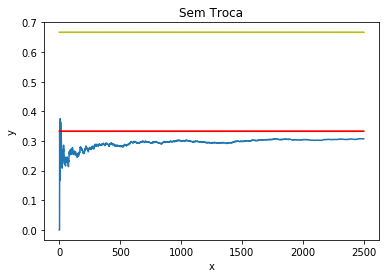

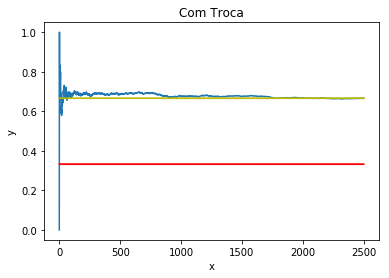

In [6]:
x = np.linspace(0, size, size)

figure()
plot(semTroca)
plot(x, [1 / 3] * size, 'r.-', markersize=0.1)
plot(x, [2 / 3] * size, 'y.-', markersize=0.1)
xlabel('x')
ylabel('y')
title('Sem Troca')
show()

figure()
plot(comTroca)
plot(x, [1 / 3] * size, 'r.-', markersize=0.1)
plot(x, [2 / 3] * size, 'y.-', markersize=0.1)
xlabel('x')
ylabel('y')
title('Com Troca')
show()


Conclusão:
    Após a repetição da simulação várias vezes, vemos que quanto maior o número de simulações realizadas, mais os casos de vitória com troca de porta se aproximam da reta 2/3, enquanto que os casos de vitória sem troca de porta se aproximam da reta 1/3, que era justamente a proporção esperada inicialmente e que agora pode ser observada com o auxílio dessa simulação da "Lei dos Grandes Números" para o problema da "Porta dos Desesperados".